In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
# Mac OS jupyter kernel dies without.
import os

from epi.models import Model, Parameter
import tensorflow as tf
import pickle
import seaborn as sns

os.environ['KMP_DUPLICATE_LIB_OK']='True'

ImportError: cannot import name 'logger'

In [ ]:
x0 = np.array([0.5, 1.5])

def plot_SNPEC_opt(logs, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,5))
    losses = [logs[i]['val_loss'] for i in range(len(logs))]
    loss = np.concatenate(losses, axis=0)
    ax.plot(loss,lw=2)
    ax.set_xlabel('iteration')
    ax.set_ylabel('val loss')
    return ax

def snpe_convergence(data, first=False):
    n_rounds = len(data)
    conv_rounds = []
    conv_perc = []
    for i in range(1,n_rounds):
        print("Round %d\r" % (i+1), end="")
        z = data[i][0]
        M = z.shape[0]
        T_x = np.array([Jeigs(z[i][None,:]) for i in range(M)])
        ok_samples = np.logical_and(
            np.logical_and(0. < T_x[:,0], T_x[:,0] < 1.),
            np.logical_and(1. < T_x[:,1], T_x[:,1] < 2.))
        num_ok = np.sum(ok_samples)
        if (num_ok > 1):
            if first:
                return i, (num_ok/float(M))
            conv_rounds.append(i)
            conv_perc.append(num_ok/float(M))
    return conv_rounds, conv_perc
    

In [6]:
print(os.getcwd())

/Users/sbittner/Documents/epi/notebooks/RNN


In [46]:
N_snpes = [2]
n_trains = [100, 1000]
n_mades = [1,2] 
n_atoms = [25, 100]
rs = [0]
plot_flg = False

SNPE_hyperparams = {}
for N in N_snpes:
    for n_train in n_trains:
        for _n_mades in n_mades:
            for _n_atoms in n_atoms:
                for _rs in rs:
                    base_path = os.path.join("data", "snpe")
                    save_dir = "SNPE_RNN_stab_amp_N=%d_ntrain=%dk_nmades=%d_natoms=%d_rs=%d" \
                        % (N, n_train//1000, _n_mades, _n_atoms, _rs)
                    save_path = os.path.join(base_path, save_dir)

                    if os.path.isdir(save_path):
                        print('Checking', save_path)
                        try:
                            with open(os.path.join(save_path, "optim.pkl"), "rb") as f:
                                optim = pickle.load(f)
                        except:
                            print('optim file not found.')
                            continue
                        print('found optim')
                        try:
                            with open(os.path.join(save_path, "networks.pkl"), "rb") as f:
                                networks = pickle.load(f)
                        except:
                            print('network file not found.')
                            continue
                    else:
                        print('path not found.')
                        continue


Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=0k_nmades=1_natoms=25_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=0k_nmades=1_natoms=100_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=0k_nmades=2_natoms=25_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=0k_nmades=2_natoms=100_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=1k_nmades=1_natoms=25_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=1k_nmades=1_natoms=100_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=1k_nmades=2_natoms=25_rs=0
found optim
network file not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=1k_nmades=2_natoms=100_rs=0
found optim
network file not found.


In [27]:
print(optim.keys())
print(len(optim['logs']))
print(optim['logs'][0].keys())
print(len(optim['trn_datasets']))
print(optim['trn_datasets'][0][0].shape, optim['trn_datasets'][0][1].shape)
print(len(optim['times']))
print(optim['times'])

dict_keys(['logs', 'trn_datasets', 'times'])
10
dict_keys(['loss', 'val_loss', 'val_loss_iter'])
10
(1000, 8) (1000, 2)
9
[20.319650888442993, 20.49807620048523, 20.690842151641846, 20.515106439590454, 20.50335669517517, 20.76880979537964, 20.504241466522217, 20.702388286590576, 20.550426483154297]


In [34]:
optim['logs'][0]

{'loss': array([9.22831856, 9.00509954, 8.81013837, 8.8755626 , 8.79162559,
        8.6455546 , 8.61951831, 8.60034168, 8.7245984 , 8.57903071,
        8.59902638, 8.60219964, 8.53377037, 8.60441443, 8.49460713,
        8.39881452, 8.42841383, 8.40335166, 8.46214173, 8.5467445 ,
        8.32983148, 8.51746343, 8.46295617, 8.3065875 , 8.1092347 ,
        8.33013684, 8.29865864, 8.15114253, 8.32223683, 8.26945204,
        8.11924846, 8.19934508, 8.1503316 , 8.10892161, 8.13955386,
        8.09349635, 8.26130442, 8.06949018, 7.99926087, 7.95592357,
        7.99426868, 7.91129235, 7.85760743, 7.93608976, 7.92465846,
        7.98155726, 7.96582276, 7.84545205, 7.8402401 , 7.74634789,
        7.83052218, 7.76794609, 7.66220917, 7.53760136, 7.78463159,
        7.72862905, 7.61882778, 7.570578  , 7.65651076, 7.58511725,
        7.40027244, 7.42229672, 7.53985648, 7.54187104, 7.36760959,
        7.45844812, 7.42077889, 7.59555259, 7.39443652, 7.31197771,
        7.32519162, 7.2864892 , 7.084615

8 6


<AxesSubplot:xlabel='iteration', ylabel='val loss'>

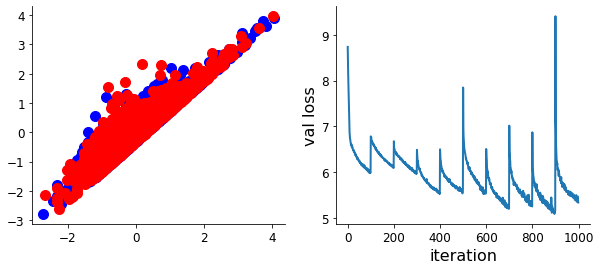

In [40]:
def pred_error(T_x):
    return np.mean(np.square(T_x - x0[None,:]))

def plot_snpe_pred(logs, trn_datasets, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,5))
    best_val_ind = np.argmin([np.min(log['val_loss']) for log in logs])
    best_pred_ind = np.argmin([pred_error(trn_dataset[1]) for trn_dataset in trn_datasets])
    eigs_val = trn_datasets[best_val_ind][1]
    eigs_pred = trn_datasets[best_pred_ind][1]
    print(best_val_ind, best_pred_ind)
    ax.scatter(eigs_val[:,0], eigs_val[:,1], c='b')
    ax.scatter(eigs_pred[:,0], eigs_pred[:,1], c='r')
    return None
    
fig, axs = plt.subplots(1,2,figsize=(10,4))
plot_snpe_pred(optim['logs'], optim['trn_datasets'], axs[0])
plot_SNPEC_opt(optim['logs'], axs[1])

In [5]:
N_snpes = [2, 5, 10, 15, 20, 25]
N_snpe_conv = [2, 5, 10, 15, 20, 25]
n_trains = [2000, 10000, 100000]
n_mades = [2,3] 
n_atoms = 100
rs = [1, 2, 3]
plot_flg = False

SNPE_hyperparams = {}
for N in N_snpes:
    SNPE_hyperparams.update({N:{'time':{}, 'T_x':{}}})
    min_time = None
    max_conv_perc = None
    
    for n_train in n_trains:
        for _n_mades in n_mades:
            _snpe_times = []
            _snpe_conv_percs = []
            for _rs in rs:
                base_path = os.path.join("data", "snpe")
                save_dir = "SNPE_RNN_stab_amp_N=%d_ntrain=%dk_nmades=%d_natoms=%d_rs=%d" \
                    % (N, n_train//1000, _n_mades, n_atoms, _rs)
                save_path = os.path.join(base_path, save_dir)

                if os.path.isdir(save_path):
                    print('Checking', save_path)
                    try:
                        with open(os.path.join(save_path, "optim.pkl"), "rb") as f:
                            optim = pickle.load(f)
                    except:
                        print('file not found.')
                        continue
                else:
                    print('path not found.')
                    continue
                logs = optim["logs"]
                data = optim["trn_datasets"]
                times = np.array(optim["times"])
                
                conv_file = os.path.join(save_path, "conv.pkl")
                if os.path.exists(conv_file):
                    with open(conv_file, "rb") as f:
                        conv = pickle.load(f)
                    conv_rounds = conv['conv_rounds']
                    conv_percs = conv['conv_percs']
                else:
                    conv_rounds, conv_percs = snpe_convergence(data)
                    with open(conv_file, "wb") as f:
                        pickle.dump({'conv_rounds':conv_rounds, 'conv_percs':conv_percs}, f)
                
                if conv_rounds:
                    conv_round = min(conv_rounds)
                    _snpe_times.append(np.sum(times[:(conv_round+1)]))
                    
                    min_val_losses = [np.min(logs[i]['val_loss']) for i in conv_rounds]
                    _snpe_conv_percs.append(conv_percs[np.argmin(min_val_losses)])
                else:
                    _snpe_times.append(np.nan)
                    _snpe_conv_percs.append(np.nan)
                    
            mean_snpe_time = np.nanmean(_snpe_times)
            mean_snpe_conv_perc = np.nanmean(_snpe_conv_percs)
            print('time', mean_snpe_time, 'min time', min_time)
            print('conv perc', mean_snpe_conv_perc, 'max_conv_perc', max_conv_perc)
            
            if (not np.isnan(mean_snpe_time)) and ((min_time is None) or (min_time > mean_snpe_time)):
                print('updating time')
                SNPE_hyperparams[N]['time'] = {'n_train':n_train, 'n_mades':_n_mades} 
                min_time = mean_snpe_time
            if (not np.isnan(mean_snpe_conv_perc)) and ((max_conv_perc is None) or (max_conv_perc < mean_snpe_conv_perc)):
                print('updating conv_perc')
                SNPE_hyperparams[N]['T_x'] = {'n_train':n_train, 'n_mades':_n_mades} 
                max_conv_perc = mean_snpe_conv_perc
                


Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=3
time 34.94392124811808 min time None
conv perc 0.02416666666666667 max_conv_perc None
updating time
updating conv_perc
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=3
time 38.23318886756897 min time 34.94392124811808
conv perc 0.025500000000000005 max_conv_perc 0.02416666666666667
updating conv_perc
path not found.
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=10k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=10k_nmades=2_natoms=100_rs=3
time 68.16151285171509 min time 34.94392124811808
conv perc 0.0247 max_conv_perc 0.025500000000000005
Checking data/snpe/

/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: Mean of empty slice
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: Mean of empty slice


Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=2_natoms=100_rs=3
time 214.3700134754181 min time None
conv perc 0.0002 max_conv_perc None
updating time
updating conv_perc
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=3_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=3_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=3_natoms=100_rs=3
time 281.7827546596527 min time 214.3700134754181
conv perc 0.0002 max_conv_perc 0.0002
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=100k_nmades=2_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=100k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=100k_nmades=2_natoms=100_rs=3
time 288.33767859141034 min time 214.3700134754181
conv perc 2.666666666666667e-05 max_conv_perc 0.0002
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=100k_nmades=3_natoms=100_r

In [6]:
N_snpes = [2, 5, 10, 15, 20]
n_atoms = 100
rs = range(1,11)

snpe_times = []
for N in N_snpes:
    time_hps = SNPE_hyperparams[N]['time']
    conv_hps = SNPE_hyperparams[N]['T_x']
    print('time hps', time_hps)
    n_train = time_hps['n_train']
    n_mades = time_hps['n_mades']
    
    _snpe_times = []
    for _rs in rs:
        base_path = os.path.join("data", "snpe")
        save_dir = "SNPE_RNN_stab_amp_N=%d_ntrain=%dk_nmades=%d_natoms=%d_rs=%d" \
            % (N, n_train//1000, n_mades, n_atoms, _rs)
        save_path = os.path.join(base_path, save_dir)

        if os.path.isdir(save_path):
            print('Checking', save_path)
            try:
                with open(os.path.join(save_path, "optim.pkl"), "rb") as f:
                    optim = pickle.load(f)
            except:
                print('file not found.')
                continue
        else:
            print(save_path, 'not found.')
            continue
        times = np.array(optim["times"])

        conv_file = os.path.join(save_path, "conv.pkl")
        if os.path.exists(conv_file):
            with open(conv_file, "rb") as f:
                conv = pickle.load(f)
            if 'conv_round' in conv.keys():
                conv_rounds = [conv['conv_round']]
                conv_percs = [conv['conv_perc']]
            else:
                conv_rounds = conv['conv_rounds']
                conv_percs = conv['conv_percs']
        else:
            data = optim["trn_datasets"]
            conv_round, conv_perc = snpe_convergence(data, first=True)
            with open(conv_file, "wb") as f:
                pickle.dump({'conv_round':conv_round, 'conv_perc':conv_perc}, f)
            conv_rounds = [conv_round]

        if conv_rounds and conv_rounds[0]:
            conv_round = min(conv_rounds)
            _snpe_times.append(np.sum(times[:(conv_round+1)]))
        else:
            _snpe_times.append(np.nan)

    snpe_times.append(_snpe_times)

snpe_times = np.array(snpe_times) / 3600.
snpe_time_mean = np.nanmean(snpe_times, axis=1)
snpe_time_std = np.nanstd(snpe_times, axis=1)
snpe_time_log_mean = np.nanmean(np.log(snpe_times), axis=1)
snpe_time_log_std = np.nanstd(np.log(snpe_times), axis=1)

time hps {'n_train': 2000, 'n_mades': 2}
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=3
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=4
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=5
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=6
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=7
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=8
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=9
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=2_natoms=100_rs=10
time hps {'n_train': 2000, 'n_mades': 2}
Checking data/snpe/SNPE_RNN_stab_amp_N=5_ntrain=2k_nmades=2_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=5_ntrain=2k_nmades=2_natoms=100_rs=2
Check

In [7]:
N_snpes = [2, 5, 10, 15, 20]
n_atoms = 100
rs = [1, 2, 3]
plot_flg = False

# Different hyperparameters are used for each plot to be as generous to SNPE as possible.
# for time plot
snpe_times = []

# for simulation plot
snpe_zs = []
snpe_T_xs = []

for N in N_snpes:
    n_train = SNPE_hyperparams[N]['T_x']['n_train']
    n_mades = SNPE_hyperparams[N]['T_x']['n_mades']
        
    _snpe_zs = []
    _snpe_T_xs = []
    for _rs in rs:
        base_path = os.path.join("data", "snpe")
        save_dir = "SNPE_RNN_stab_amp_N=%d_ntrain=%dk_nmades=%d_natoms=%d_rs=%d" \
            % (N, n_train//1000, n_mades, n_atoms, _rs)
        save_path = os.path.join(base_path, save_dir)

        if os.path.isdir(save_path):
            print('Checking', save_path)
            with open(os.path.join(save_path, "optim.pkl"), "rb") as f:
                optim = pickle.load(f)
                
        logs = optim["logs"]
        data = optim["trn_datasets"]
                
        conv_file = os.path.join(save_path, "conv.pkl")
        if os.path.exists(conv_file):
            with open(conv_file, "rb") as f:
                conv = pickle.load(f)
            if 'conv_round' in conv.keys():
                conv_rounds = [conv['conv_round']]
                conv_percs = [conv['conv_perc']]
            else:
                conv_rounds = conv['conv_rounds']
                conv_percs = conv['conv_percs']
        else:
            conv_round, conv_perc = snpe_convergence(data, first=True)
            with open(conv_file, "wb") as f:
                pickle.dump({'conv_round':conv_round, 'conv_perc':conv_perc}, f)
            conv_rounds = [conv_round]
        
        if conv_rounds and conv_rounds[0]:
            min_val_losses = [np.min(logs[i]['val_loss']) for i in conv_rounds]
            best_round = conv_rounds[np.argmin(min_val_losses)]

            z = data[best_round][0]
            T_x = np.array([Jeigs(z[i][None,:]) for i in range(n_train)])
        else:
            z = np.nan*np.ones((n_train,N*4))
            T_x = np.nan*np.ones((n_train,2))

        _snpe_zs.append(z)
        _snpe_T_xs.append(T_x)

    snpe_zs.append(np.array(_snpe_zs))
    snpe_T_xs.append(_snpe_T_xs)

snpe_zs = snpe_zs
snpe_T_xs = np.array(snpe_T_xs)



Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=2_ntrain=2k_nmades=3_natoms=100_rs=3
Checking data/snpe/SNPE_RNN_stab_amp_N=5_ntrain=2k_nmades=2_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=5_ntrain=2k_nmades=2_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=5_ntrain=2k_nmades=2_natoms=100_rs=3
Checking data/snpe/SNPE_RNN_stab_amp_N=10_ntrain=2k_nmades=3_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=10_ntrain=2k_nmades=3_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=10_ntrain=2k_nmades=3_natoms=100_rs=3
Checking data/snpe/SNPE_RNN_stab_amp_N=15_ntrain=2k_nmades=3_natoms=100_rs=1
Checking data/snpe/SNPE_RNN_stab_amp_N=15_ntrain=2k_nmades=3_natoms=100_rs=2
Checking data/snpe/SNPE_RNN_stab_amp_N=15_ntrain=2k_nmades=3_natoms=100_rs=3
Checking data/snpe/SNPE_RNN_stab_amp_N=20_ntrain=10k_nmades=2_natoms=100_rs=1
Chec

/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/ipykernel_launcher.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


###  EPI

In [8]:
N = 2
r = 2

# 1. Define model: dxd matrix
D = int(N*r)

# Set up the bound vectors.
lb = -np.ones((D,))
ub = np.ones((D,))

# Define the parameter A.
U = Parameter("U", D, lb=lb, ub=ub)
V = Parameter("V", D, lb=lb, ub=ub)
parameters = [U, V]

# Define the model matrix.
model = Model("Rank2Net", parameters)

# 2. Define the emergent property:
def stable_amplification_r2(U, V):
    U = tf.reshape(U, (-1, N, 2))
    V = tf.reshape(V, (-1, N, 2))
    J = tf.matmul(U, tf.transpose(V, [0,2,1]))
    Js = (J + tf.transpose(J, [0, 2, 1])) / 2.
    Js_eigs = tf.linalg.eigvalsh(Js)
    Js_eig_max = tf.reduce_max(Js_eigs, axis=1)

    # Take eig of low rank similar mat
    Jr = tf.matmul(tf.transpose(V, [0,2,1]), U) + 0.01*tf.eye(2)[None,:,:]
    Jr_tr = tf.linalg.trace(Jr)
    maybe_complex_term = tf.complex(tf.square(Jr_tr) + -4.*tf.linalg.det(Jr), 0.)
    J_eig_realmax = 0.5 * (Jr_tr + tf.math.real(tf.sqrt(maybe_complex_term)))

    T_x = tf.stack([Js_eig_max, tf.square(Js_eig_max-Js_eig_max_mean),
                    J_eig_realmax, tf.square(J_eig_realmax-J_eig_realmax_mean)], axis=1)
    return T_x

model.set_eps(stable_amplification_r2)
epi_df = model.get_epi_df()

epi_df['N'] = [row['init']['mu'].shape[0]//4 for i, row in epi_df.iterrows()]
epi_df['beta'] = [row['AL_hps']['beta'] for i, row in epi_df.iterrows()]
epi_df['M'] = [row['AL_hps']['N'] for i, row in epi_df.iterrows()]
epi_df['rs'] = [row['arch']['random_seed'] for i, row in epi_df.iterrows()]
epi_df['Rnorm'] = [np.linalg.norm([row['R%d' % j] for j in range(1,5)])
                   for i, row in epi_df.iterrows()]

epi_zs = []
epi_log_probs = []
epi_times = []
epi_T_xs = []
N_epis = [2,5,10,15,20,25,50,100,250]
#N_epis = [250]
rs = [1,2,3,4,5]
Mz = 1000
for i, N in enumerate(N_epis):
    print('*******************', N, '***********************')
    # 1. Define model: dxd matrix
    D = int(N*r)

    # Set up the bound vectors.
    lb = -np.ones((D,))
    ub = np.ones((D,))

    # Define the parameter A.
    U = Parameter("U", D, lb=lb, ub=ub)
    V = Parameter("V", D, lb=lb, ub=ub)
    parameters = [U, V]

    # Define the model matrix.
    model = Model("Rank2Net", parameters)
    
    def stable_amplification_r2(U, V):
        U = tf.reshape(U, (-1, N, 2))
        V = tf.reshape(V, (-1, N, 2))
        J = tf.matmul(U, tf.transpose(V, [0,2,1]))
        Js = (J + tf.transpose(J, [0, 2, 1])) / 2.
        Js_eigs = tf.linalg.eigvalsh(Js)
        Js_eig_max = tf.reduce_max(Js_eigs, axis=1)

        # Take eig of low rank similar mat
        Jr = tf.matmul(tf.transpose(V, [0,2,1]), U) + 0.01*tf.eye(2)[None,:,:]
        Jr_tr = tf.linalg.trace(Jr)
        maybe_complex_term = tf.complex(tf.square(Jr_tr) + -4.*tf.linalg.det(Jr), 0.)
        J_eig_realmax = 0.5 * (Jr_tr + tf.math.real(tf.sqrt(maybe_complex_term)))

        T_x = tf.stack([Js_eig_max, tf.square(Js_eig_max-Js_eig_max_mean),
                        J_eig_realmax, tf.square(J_eig_realmax-J_eig_realmax_mean)], axis=1)
        return T_x
    model.set_eps(stable_amplification_r2)
 
    _epi_zs = []
    _epi_log_probs = []
    _epi_T_xs = []
    _epi_times = []
    for _rs in rs:
        row_ind = (epi_df['converged']==True) & (epi_df['N']==N) & (epi_df['M']==100) \
                & (epi_df['rs']==_rs) & (epi_df['beta']==4.)
        if row_ind.sum() == 0:
            _epi_times.append(np.nan)
            _epi_zs.append(np.nan*np.ones((Mz,4*N)))
            _epi_log_probs.append(np.nan*np.ones((Mz,)))
            _epi_T_xs.append(np.nan*np.ones((Mz,2)))
            print(N, _rs, 'caught failed opt')
            continue
            
        row = epi_df[row_ind].iloc[0]
        timing = np.load(os.path.join(row['path'], 'timing.npz'))
        time_to_converge = timing['time_per_it']*row['iteration']
        print(N, _rs, timing['time_per_it'], row['iteration'], time_to_converge, time_to_converge/3600.)
        _epi_times.append(time_to_converge)

        dist = model.get_epi_dist(row)
        z = dist.sample(Mz)
        log_prob = dist.log_prob(z)
        T = model.eps(z)
        T_x = np.stack((T[:,2], T[:,0]), axis=1)
        _epi_zs.append(z)
        _epi_log_probs.append(log_prob)
        _epi_T_xs.append(T_x)
        
    epi_zs.append(np.array(_epi_zs))
    epi_log_probs.append(_epi_log_probs)
    epi_T_xs.append(_epi_T_xs)
    epi_times.append(_epi_times)
    
epi_times = np.array(epi_times)/3600.
epi_log_probs = np.array(epi_log_probs)
epi_T_xs = np.array(epi_T_xs)
epi_time_mean = np.nanmean(epi_times, axis=1)
epi_time_std = np.nanstd(epi_times, axis=1)
epi_time_log_mean = np.nanmean(np.log(epi_times), axis=1)
epi_time_log_std = np.nanstd(np.log(epi_times), axis=1)

/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
Instructions for updating:
`AffineScalar` bijector is deprecated; please use `tfb.Shift(loc)(tfb.Scale(...))` instead.


******************* 2 ***********************
2 1 0.003209352493286133 7000 22.46546745300293 0.006240407625834147
ckpt_dir data/epi/Rank2Net/66940a8fc592aa16d5cf0717aac9b82b/D8_C3_affine_L2_U16_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00
2 2 0.004029750823974609 6000 24.178504943847656 0.006716251373291016
ckpt_dir data/epi/Rank2Net/66940a8fc592aa16d5cf0717aac9b82b/D8_C3_affine_L2_U16_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


2 3 0.003657817840576172 5000 18.28908920288086 0.005080302556355794
ckpt_dir data/epi/Rank2Net/66940a8fc592aa16d5cf0717aac9b82b/D8_C3_affine_L2_U16_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


2 4 0.003207683563232422 6000 19.24610137939453 0.005346139272054036
ckpt_dir data/epi/Rank2Net/66940a8fc592aa16d5cf0717aac9b82b/D8_C3_affine_L2_U16_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


2 5 0.006884098052978516 6000 41.304588317871094 0.011473496754964193
ckpt_dir data/epi/Rank2Net/66940a8fc592aa16d5cf0717aac9b82b/D8_C3_affine_L2_U50_PA_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 5 ***********************
5 1 0.005781412124633789 7000 40.46988487243652 0.011241634686787924
ckpt_dir data/epi/Rank2Net/ec029f0953b4719cc1abb6d6456116c5/D20_C3_affine_L2_U40_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


5 2 0.005724430084228516 6000 34.346580505371094 0.009540716807047525
ckpt_dir data/epi/Rank2Net/ec029f0953b4719cc1abb6d6456116c5/D20_C3_affine_L2_U40_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


5 3 0.006845712661743164 6000 41.074275970458984 0.011409521102905273
ckpt_dir data/epi/Rank2Net/ec029f0953b4719cc1abb6d6456116c5/D20_C3_affine_L2_U40_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


5 4 0.006717681884765625 7000 47.023773193359375 0.013062159220377604
ckpt_dir data/epi/Rank2Net/ec029f0953b4719cc1abb6d6456116c5/D20_C3_affine_L2_U40_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


5 5 0.006560564041137695 7000 45.92394828796387 0.012756652302212186
ckpt_dir data/epi/Rank2Net/ec029f0953b4719cc1abb6d6456116c5/D20_C3_affine_L2_U40_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 10 ***********************
10 1 0.010874748229980469 5000 54.373741149902344 0.015103816986083984
ckpt_dir data/epi/Rank2Net/2952d4fc638cd004b5b2e1f04f6aff47/D40_C3_affine_L2_U80_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


10 2 0.016031742095947266 6000 96.1904525756836 0.02671957015991211
ckpt_dir data/epi/Rank2Net/2952d4fc638cd004b5b2e1f04f6aff47/D40_C3_affine_L2_U80_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


10 3 0.013204097747802734 5000 66.02048873901367 0.01833902464972602
ckpt_dir data/epi/Rank2Net/2952d4fc638cd004b5b2e1f04f6aff47/D40_C3_affine_L2_U80_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


10 4 0.012532234191894531 6000 75.19340515136719 0.020887056986490887
ckpt_dir data/epi/Rank2Net/2952d4fc638cd004b5b2e1f04f6aff47/D40_C3_affine_L2_U80_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


10 5 0.013573408126831055 6000 81.44044876098633 0.022622346878051758
ckpt_dir data/epi/Rank2Net/2952d4fc638cd004b5b2e1f04f6aff47/D40_C3_affine_L2_U80_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 15 ***********************
15 1 0.01856684684753418 6000 111.40108108520508 0.0309447447458903
ckpt_dir data/epi/Rank2Net/e028e800b085292b1cf0d5394608feba/D60_C3_affine_L2_U100_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


15 2 0.017547607421875 6000 105.28564453125 0.029246012369791668
ckpt_dir data/epi/Rank2Net/e028e800b085292b1cf0d5394608feba/D60_C3_affine_L2_U100_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


15 3 0.0174863338470459 7000 122.40433692932129 0.034001204702589244
ckpt_dir data/epi/Rank2Net/e028e800b085292b1cf0d5394608feba/D60_C3_affine_L2_U100_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


15 4 0.02002239227294922 7000 140.15674591064453 0.03893242941962348
ckpt_dir data/epi/Rank2Net/e028e800b085292b1cf0d5394608feba/D60_C3_affine_L2_U100_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


15 5 0.020563840866088867 7000 143.94688606262207 0.03998524612850613
ckpt_dir data/epi/Rank2Net/e028e800b085292b1cf0d5394608feba/D60_C3_affine_L2_U100_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 20 ***********************
20 1 0.02426004409790039 8000 194.08035278320312 0.05391120910644531
ckpt_dir data/epi/Rank2Net/d3179c8ba95e7af70d4653ac1d113735/D80_C3_affine_L2_U100_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


20 2 0.02765488624572754 8000 221.2390899658203 0.06145530276828342
ckpt_dir data/epi/Rank2Net/d3179c8ba95e7af70d4653ac1d113735/D80_C3_affine_L2_U100_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


20 3 0.02785181999206543 8000 222.81455993652344 0.061892933315700956
ckpt_dir data/epi/Rank2Net/d3179c8ba95e7af70d4653ac1d113735/D80_C3_affine_L2_U100_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


20 4 0.028614521026611328 8000 228.91616821289062 0.06358782450358073
ckpt_dir data/epi/Rank2Net/d3179c8ba95e7af70d4653ac1d113735/D80_C3_affine_L2_U100_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


20 5 0.024601459503173828 9000 221.41313552856445 0.06150364875793457
ckpt_dir data/epi/Rank2Net/d3179c8ba95e7af70d4653ac1d113735/D80_C3_affine_L2_U100_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 25 ***********************
25 1 0.03873586654663086 8000 309.8869323730469 0.08607970343695746
ckpt_dir data/epi/Rank2Net/e766aba28520df2df4c841e6bf517739/D100_C3_affine_L2_U100_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


25 2 0.03490161895751953 10000 349.0161895751953 0.09694894154866536
ckpt_dir data/epi/Rank2Net/e766aba28520df2df4c841e6bf517739/D100_C3_affine_L2_U100_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


25 3 0.03900504112243652 8000 312.0403289794922 0.08667786916097005
ckpt_dir data/epi/Rank2Net/e766aba28520df2df4c841e6bf517739/D100_C3_affine_L2_U100_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


25 4 0.03823733329772949 8000 305.89866638183594 0.0849718517727322
ckpt_dir data/epi/Rank2Net/e766aba28520df2df4c841e6bf517739/D100_C3_affine_L2_U100_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


25 5 0.03575015068054199 8000 286.00120544433594 0.07944477929009332
ckpt_dir data/epi/Rank2Net/e766aba28520df2df4c841e6bf517739/D100_C3_affine_L2_U100_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 50 ***********************
50 1 0.12702727317810059 9000 1143.2454586029053 0.31756818294525146
ckpt_dir data/epi/Rank2Net/779c852f86c903444c25c72feae952b9/D200_C3_affine_L2_U100_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


50 2 0.12749505043029785 9000 1147.4554538726807 0.31873762607574463
ckpt_dir data/epi/Rank2Net/779c852f86c903444c25c72feae952b9/D200_C3_affine_L2_U100_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


50 3 0.13264894485473633 9000 1193.840503692627 0.3316223621368408
ckpt_dir data/epi/Rank2Net/779c852f86c903444c25c72feae952b9/D200_C3_affine_L2_U100_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


50 4 0.14435434341430664 9000 1299.1890907287598 0.3608858585357666
ckpt_dir data/epi/Rank2Net/779c852f86c903444c25c72feae952b9/D200_C3_affine_L2_U100_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


50 5 0.14728617668151855 9000 1325.575590133667 0.3682154417037964
ckpt_dir data/epi/Rank2Net/779c852f86c903444c25c72feae952b9/D200_C3_affine_L2_U100_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 100 ***********************
100 1 0.743384599685669 10000 7433.845996856689 2.0649572213490806
ckpt_dir data/epi/Rank2Net/13a4a6fd521c0d9e1009bd531bec0065/D400_C3_affine_L2_U100_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


100 2 0.7397735118865967 10000 7397.735118865967 2.054926421907213
ckpt_dir data/epi/Rank2Net/13a4a6fd521c0d9e1009bd531bec0065/D400_C3_affine_L2_U100_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


100 3 0.7362756729125977 11000 8099.032402038574 2.2497312227884927
ckpt_dir data/epi/Rank2Net/13a4a6fd521c0d9e1009bd531bec0065/D400_C3_affine_L2_U100_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


100 4 0.7410268783569336 10000 7410.268783569336 2.0584079954359265
ckpt_dir data/epi/Rank2Net/13a4a6fd521c0d9e1009bd531bec0065/D400_C3_affine_L2_U100_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


100 5 0.6972928047180176 11000 7670.220851898193 2.1306169033050537
ckpt_dir data/epi/Rank2Net/13a4a6fd521c0d9e1009bd531bec0065/D400_C3_affine_L2_U100_rs5/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


******************* 250 ***********************
250 1 7.955256462097168 10000 79552.56462097168 22.097934616936577
ckpt_dir data/epi/Rank2Net/f24cd64dd580fe177f3fe2a8e4f45f74/D1000_C3_affine_L2_U50_PA_rs1/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


250 2 8.445390224456787 10000 84453.90224456787 23.45941729015774
ckpt_dir data/epi/Rank2Net/f24cd64dd580fe177f3fe2a8e4f45f74/D1000_C3_affine_L2_U50_PA_rs2/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


250 3 8.464842557907104 13000 110042.95325279236 30.567487014664543
ckpt_dir data/epi/Rank2Net/f24cd64dd580fe177f3fe2a8e4f45f74/D1000_C3_affine_L2_U50_PA_rs3/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


250 4 8.41284966468811 13000 109367.04564094543 30.37973490026262
ckpt_dir data/epi/Rank2Net/f24cd64dd580fe177f3fe2a8e4f45f74/D1000_C3_affine_L2_U50_PA_rs4/63ecfd862e3261f904a454d0f560982e/N100_lr1.00E-03_c0=3.00E+00_gamma2.50E-01_beta4.00E+00


/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/sbittner/anaconda/envs/epi/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:2273: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


250 5 caught failed opt


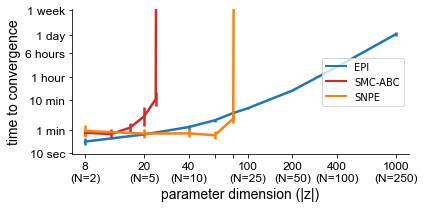

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,3))

all_Ns = [2,5,10,15,20,25,50,100,250]
N_xs = [2, 5, 10, 25, 50, 100, 250]
D_xticks = np.array([4*N for N in all_Ns])
xticks = np.log(D_xticks)
xtick_labels = ["%d\n(N=%d)" % (D,D//4) if ((D//4) in N_xs) else ''
                for D in D_xticks]

D_smcs = [4*N for N in N_smcs]
D_snpes = [4*N for N in N_snpes]
D_epis = [4*N for N in N_epis]
yticks = np.log([1/360., 1/60., 1/6., 1., 6., 24., 7*24.])
ytick_labels = ["10 sec", "1 min", "10 min", "1 hour", "6 hours", "1 day", "1 week"]

colors = sns.color_palette()
lw = 2.5
fontsize = 14

# add failure extensions
D_smcs.append(26)
_smc_time_log_mean = np.concatenate((smc_time_log_mean, np.array([7*24.]))) #np.array([epi_time_log_mean[-1]])))
_smc_time_log_std = np.concatenate((smc_time_log_std, np.array([0.])))
D_snpes.append(90)
_snpe_time_log_mean = np.concatenate((snpe_time_log_mean, np.array([7*24.])))#np.array([epi_time_log_mean[-1]])))
_snpe_time_log_std = np.concatenate((snpe_time_log_std, np.array([0.])))

ax.plot([0,0],[0,0], '-', c=colors[0], label='EPI')
ax.plot([0,0],[0,0], '-', c=colors[3], label='SMC-ABC')
ax.plot([0,0],[0,0], '-', c=colors[1], label='SNPE')
ax.errorbar(x=np.log(D_epis), y=epi_time_log_mean, yerr=epi_time_log_std, 
            color=colors[0], ecolor=colors[0], lw=lw)
ax.errorbar(x=np.log(D_smcs), y=_smc_time_log_mean, yerr=_smc_time_log_std, 
            color=colors[3], ecolor=colors[3], lw=lw)
ax.errorbar(x=np.log(D_snpes), y=_snpe_time_log_mean, yerr=_snpe_time_log_std, 
            color=colors[1], ecolor=colors[1], lw=lw)

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontname="Arial", fontsize=fontsize-2)
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels, fontname="Arial", fontsize=fontsize-2)

ax.set_xlabel('parameter dimension (|z|)', fontname="Arial", fontsize=fontsize)
ax.set_ylabel('time to convergence', fontname="Arial", fontsize=fontsize)

xbuf = 0.2
ybuf = 0.1
ax.set_xlim(np.log(8.)-xbuf, np.log(1000.)+xbuf)
ax.set_ylim([np.min(np.log(1./360.))-ybuf, np.log(7*24.)+ybuf])
ax.legend(fontsize=fontsize-4, loc=5)
plt.tight_layout()
plt.savefig(os.path.join(figdir, "EPI_both.png"))
plt.show()

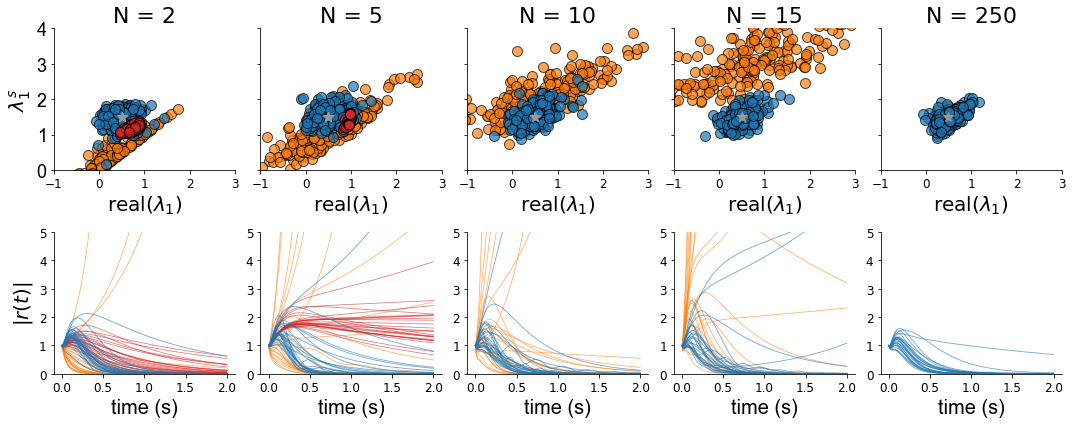

In [17]:
def eig_scatter(T_x, c='k', ax=None, label=None):
    alpha = 0.7
    grayval = 0.6
    gray = grayval*np.ones(3)
    
    if T_x is None:
        return None
    J_real_max_eig = T_x[:,0]
    Js_max_eig = T_x[:,1]
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(5,5))
    ax.plot([0.5], [1.5], '*', c=gray, markersize=10)
    """ax.plot([0, 0], [1, 2], '--', c=gray)
    ax.plot([1, 1], [1, 2], '--', c=gray)
    ax.plot([0, 1], [2, 2], '--', c=gray)
    ax.plot([0, 1], [1, 1], '--', c=gray)"""
    ax.scatter(J_real_max_eig, Js_max_eig, 
               color=c, edgecolors='k', 
               alpha=alpha, label=label)
    return None

def sim_r2RNN(z, N, M, t):
    U = np.reshape(z[:,:(2*N)], (-1, N, 2))
    V = np.reshape(z[:,(2*N):], (-1, N, 2))
    J = np.matmul(U, np.transpose(V, [0,2,1]))
    J = J + np.random.normal(0., 0.01, J.shape)

    r_ts = []
    for m in range(M):
        _J = J[m] + 0.01*np.eye(N)
        f = lambda r, t : (1/0.1)*(-r + np.dot(_J, r))
        u, s, v = np.linalg.svd(_J, full_matrices=False)
        r_R_t = scipy.integrate.odeint(f, v[0], t)
        r_ts.append(np.linalg.norm(r_R_t, axis=1))
    r_ts = np.array(r_ts)
    return r_ts

t = np.linspace(0,2,201)

N_plot_eigs = [2,5,10,15,250]
num_cols = len(N_plot_eigs)
n_plot = 200
n_traces = 25
lw = .8
alpha = .6
yticks = [0,1,2,3,4]
fontsize=20
fig, axs = plt.subplots(2,num_cols,figsize=(3*num_cols,6))
for i, N in enumerate(N_plot_eigs):
    ax = axs[0][i]
    z_smc, z_snpe, z_epi = None, None, None
    T_x_smc, T_x_snpe, T_x_epi = None, None, None
    r_t_smc, r_t_snpe, r_t_epi = None, None, None
    # Load zs, T_xs
    t = np.linspace(0,2,201)
    if N in N_snpes:
        if not N == 25:
            ind = 0 if N < 20 else 1
            z_snpe = snpe_zs[N_snpes.index(N)][ind][:n_plot,:]
            T_x_snpe = snpe_T_xs[N_snpes.index(N),ind][:n_plot,:]
            r_t_snpe = sim_r2RNN(z_snpe, N, n_traces, t)
    if N in N_epis:
        ind = 1 if not N==100 else 0
        if N==250:
            ind = 0
        z_epi = epi_zs[N_epis.index(N)][ind][:n_plot,:]
        T_x_epi = epi_T_xs[N_epis.index(N),ind][:n_plot,:]
        r_t_epi = sim_r2RNN(z_epi, N, n_traces, t)
    if N in N_smcs:
        z_smc = np.concatenate(smc_zs[N_smcs.index(N)][:,:(n_plot//10),:], axis=0)
        T_x_smc = np.concatenate(smc_T_xs[N_smcs.index(N)][:,:(n_plot//10),:], axis=0)
        r_t_smc = sim_r2RNN(z_smc, N, n_traces, t)
        
    # Sim from network parameters
    
    eig_scatter(T_x_snpe, c=colors[1], ax=ax, label='SNPE')
    eig_scatter(T_x_epi, c=colors[0], ax=ax, label='EPI')
    eig_scatter(T_x_smc, c=colors[3], ax=ax, label='SMC-ABC')
    ax.set_xlim([-1, 3])
    ax.set_ylim([0, 4])
    ax.set_yticks(yticks)
    if (i==0):
        ax.set_ylabel(r'$\lambda^s_1$', fontname="Arial", fontsize=fontsize)
        ax.set_yticklabels(yticks, fontname="Arial", fontsize=(fontsize-2))
        #ax.legend(fontsize=(fontsize-2), framealpha=0.2, loc=2)
    else:
        ax.set_yticklabels(len(yticks)*[''])
    ax.set_xlabel(r'real($\lambda_1$)', fontsize=fontsize)
    ax.set_title('N = %d' % (N), fontsize=(fontsize+2))
    
    ax = axs[1][i]
    if r_t_snpe is not None:
        ax.plot(t, r_t_snpe.T, c=colors[1], lw=lw, alpha=alpha)
    if r_t_smc is not None:
        ax.plot(t, r_t_smc.T, c=colors[3], lw=lw, alpha=alpha)
    if r_t_epi is not None:
        ax.plot(t, r_t_epi.T, c=colors[0], lw=lw+.1, alpha=alpha)
    if i==0:
        ax.set_ylabel(r'$|r(t)|$', fontname="Arial", fontsize=fontsize)
    ax.set_xlabel('time (s)', fontname="Arial", fontsize=fontsize)
    ax.set_ylim([0,5])
plt.tight_layout()
plt.savefig(os.path.join(figdir, "EPI_scaling3.png"))
plt.show()

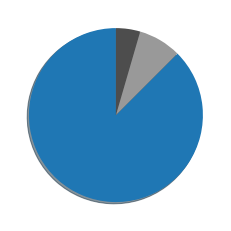

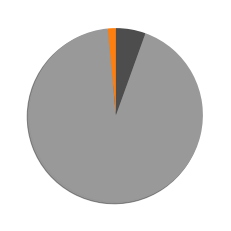

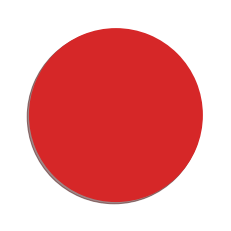

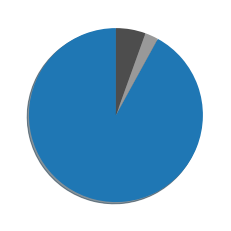

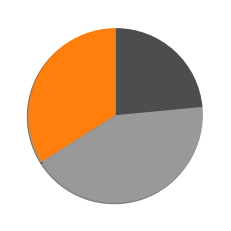

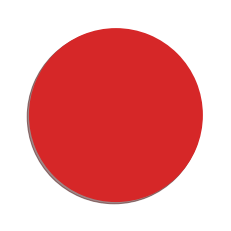

In [22]:
def regime_breakdown(T_x, c='k'):
    total = T_x.shape[0]
    num_stable_amp = np.sum(np.logical_and(T_x[:,0] < 1., T_x[:,1] > 1.))
    num_stable_mon = np.sum(np.logical_and(T_x[:,0] < 1., T_x[:,1] < 1.))
    num_unstable = np.sum(T_x[:,0] > 1.)
    sizes = [num_stable_amp, num_stable_mon, num_unstable]
    #labels = ['stable amplification', 'stable monotonic', 'unstable']
    explode = [0., 0., 0.]
    fig, ax = plt.subplots(1,1)
    ax.pie(sizes, colors=[c, 0.6*np.ones(3), 0.3*np.ones(3)], explode=explode, #labels=labels,
        shadow=True, startangle=90)

    return num_stable_amp, num_stable_mon, num_unstable

N_pies = [2, 5]
for i, N in enumerate(N_pies):
    ax = axs[0][i]
    z_smc, z_snpe, z_epi = None, None, None
    T_x_smc, T_x_snpe, T_x_epi = None, None, None
    r_t_smc, r_t_snpe, r_t_epi = None, None, None
    # Load zs, T_xs
    t = np.linspace(0,2,201)
    if N in N_snpes:
        if not N == 25:
            ind = 0 if N < 20 else 1
            z_snpe = snpe_zs[N_snpes.index(N)][ind][:n_plot,:]
            T_x_snpe = snpe_T_xs[N_snpes.index(N),ind][:n_plot,:]
            r_t_snpe = sim_r2RNN(z_snpe, N, n_traces, t)
    if N in N_epis:
        ind = 1 if not N==100 else 0
        if N==250:
            ind = 0
            t = np.linspace(0,0.2,201)
        z_epi = epi_zs[N_epis.index(N)][ind][:n_plot,:]
        T_x_epi = epi_T_xs[N_epis.index(N),ind][:n_plot,:]
        r_t_epi = sim_r2RNN(z_epi, N, n_traces, t)
    if N in N_smcs:
        z_smc = np.concatenate(smc_zs[N_smcs.index(N)][:,:(n_plot//10),:], axis=0)
        T_x_smc = np.concatenate(smc_T_xs[N_smcs.index(N)][:,:(n_plot//10),:], axis=0)
        r_t_smc = sim_r2RNN(z_smc, N, n_traces, t)
        
    regime_breakdown(T_x_epi, colors[0])
    plt.savefig(os.path.join(figdir, "EPI_pie_N=%d" % N))
    plt.show()
    regime_breakdown(T_x_snpe, colors[1])
    plt.savefig(os.path.join(figdir, "SNPE_pie_N=%d" % N))
    plt.show()
    regime_breakdown(T_x_smc, colors[3])
    plt.savefig(os.path.join(figdir, "SMC_pie_N=%d" % N))
    plt.show()
